(CONFIDENTIAL) INTERNAL USE ONLY, NOT FOR EXTERNAL DISTRIBUTION

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [324]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Clustering

In [330]:
import sklearn as sk
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%matplotlib inline

In [331]:
from sklearn import datasets
from sklearn import cluster

## Kmeans

In [346]:
# Create blob dataset
X, y = datasets.make_blobs(
    n_samples=1500,
    n_features=2,
    centers=5,
    random_state=1
)

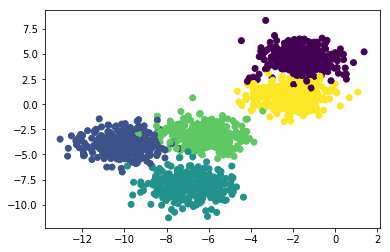

In [347]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [340]:
kmeans = cluster.KMeans(n_clusters=4, random_state=1)

In [341]:
ypred = kmeans.fit_predict(X)

In [342]:
# kmeans.labels_
# kmeans.inertia_

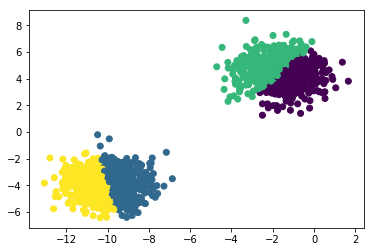

In [343]:
plt.scatter(X[:, 0], X[:, 1], c=ypred)
plt.show()

### Kmeans is sensitive to the number of centroids: How to find the best K?

In [326]:
# Elbow method
# ks: [1, 2, 3, ..., 10]
# inertia_: distance sum
# plot inertia_ vs k

In [348]:
ks = list(range(1, 10))
costs = []
for k in ks:
    kmeans = cluster.KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    cost = kmeans.inertia_
    costs.append(cost)
    print("k={}: cost={}".format(k, cost))

k=1: cost=45569.1199302
k=2: cost=11702.5655515
k=3: cost=7214.13446796
k=4: cost=4999.75505703
k=5: cost=2842.04071585
k=6: cost=2623.44647612
k=7: cost=2403.69273767
k=8: cost=2195.02404089
k=9: cost=2039.94858602


In [349]:
# k = # num samples in data

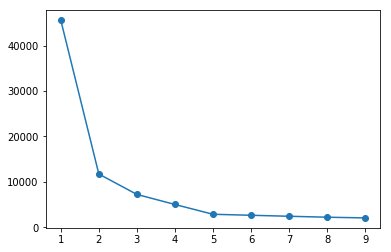

In [350]:
plt.plot(ks, costs, 'o-')
plt.show()

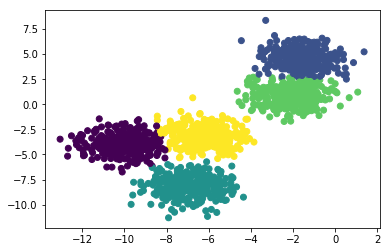

In [351]:
kmeans = cluster.KMeans(n_clusters=5, random_state=1)
ypred = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=ypred)
plt.show()

### Kmeans 对数据分布的敏感度

In [321]:
# Anisotropic

In [352]:
T = np.array([[0.6, -0.636], [-0.40, 0.85]])

Xani, yani = datasets.make_blobs(
    n_samples=n_samples,
    n_features=2,
    centers=3,
    cluster_std=1.0,
    random_state=170)

Xani = Xani.dot(T)

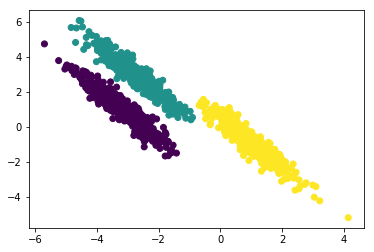

In [353]:
plt.scatter(Xani[:, 0], Xani[:, 1], c=yani)
plt.show()

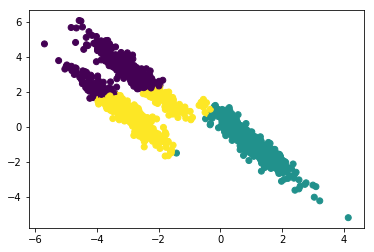

In [354]:
kmeans = cluster.KMeans(n_clusters=3, random_state=1)
ypred = kmeans.fit_predict(Xani)
plt.scatter(Xani[:, 0], Xani[:, 1], c=ypred)
plt.show()

In [320]:
# Circle

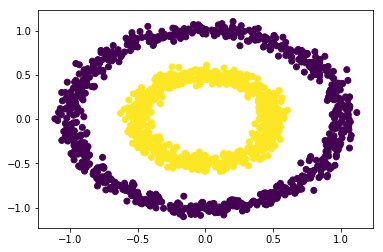

In [355]:
Xcircle, ycircle = datasets.make_circles(n_samples=1500, factor=.5, noise=0.05, random_state=1)

plt.scatter(Xcircle[:, 0], Xcircle[:, 1], c=ycircle)
plt.show()

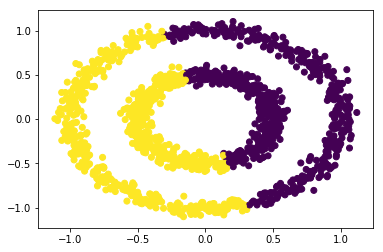

In [356]:
kmeans = cluster.KMeans(n_clusters=2, random_state=1)
ypred = kmeans.fit_predict(Xcircle)
plt.scatter(Xcircle[:, 0], Xcircle[:, 1], c=ypred)
plt.show()

In [ ]:
# But at the very beginning we don't know the shapes, therefore K-means is almost useless

## DBSCAN

In [316]:
# Anisotropic data

In [362]:
X, y = datasets.make_blobs(
    n_samples=1500,
    n_features=2,
    centers=3,
    cluster_std=1.0,
    random_state=170)

print(X.shape)

(1500, 2)


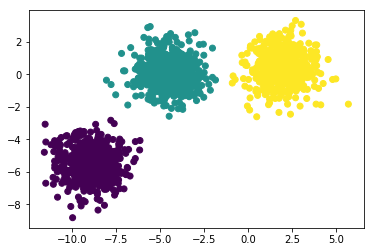

In [363]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [380]:
dbscan = cluster.DBSCAN(eps=0.7, min_samples=5)

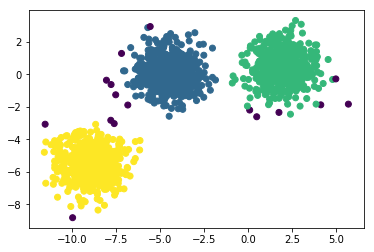

In [381]:
ypred = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=ypred)
plt.show()

In [382]:
# anisotropic data

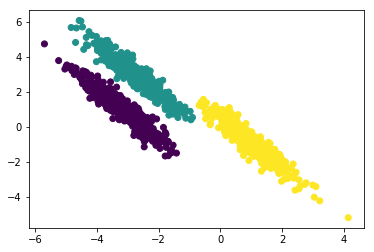

In [383]:
plt.scatter(Xani[:, 0], Xani[:, 1], c=yani)

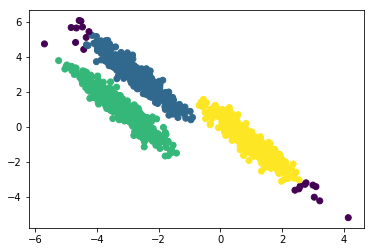

In [386]:
dbscan = cluster.DBSCAN(eps=0.4, min_samples=10)
yani_pred = dbscan.fit_predict(Xani)
plt.scatter(Xani[:, 0], Xani[:, 1], c=yani_pred)

In [395]:
nbrs = sk.neighbors.NearestNeighbors(n_neighbors=10).fit(Xani)

In [396]:
dist, indices = nbrs.kneighbors(Xani)

In [397]:
dist.shape

(1500, 10)

In [400]:
k_dists = dist[:, -1]
k_dists = np.sort(k_dists)

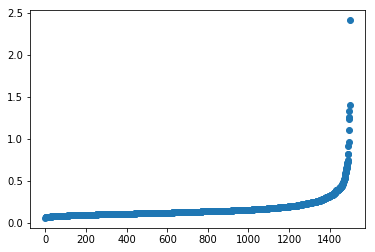

In [401]:
plt.plot(k_dists, 'o')
plt.show()

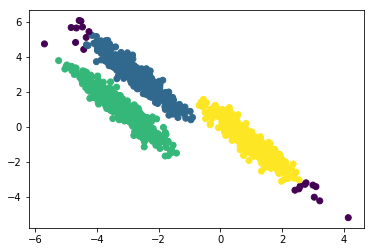

In [440]:
dbscan = cluster.DBSCAN(eps=0.4, min_samples=10)
yani_pred = dbscan.fit_predict(Xani)
plt.scatter(Xani[:, 0], Xani[:, 1], c=yani_pred)

In [444]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2])

In [445]:
import collections

In [446]:
collections.Counter(dbscan.labels_.tolist())

Counter({-1: 20, 0: 491, 1: 499, 2: 490})

In [447]:
outliers_indices = []
for idx, label in enumerate(dbscan.labels_):
    if label == -1:
        outliers_indices.append(idx)

In [449]:
print outliers_indices

[10, 90, 91, 180, 311, 521, 616, 675, 742, 760, 843, 904, 906, 914, 986, 987, 1039, 1372, 1389, 1413]


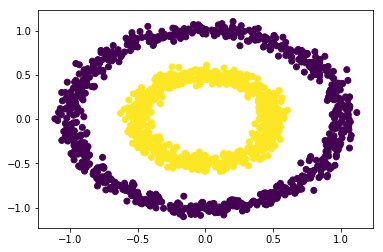

In [387]:
# circle data
plt.scatter(Xcircle[:, 0], Xcircle[:, 1], c=ycircle)

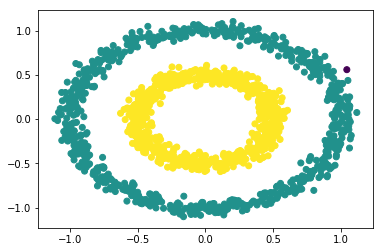

In [390]:
dbscan = cluster.DBSCAN(eps=0.1, min_samples=10)
ycircle_dbscan = dbscan.fit_predict(Xcircle)
plt.scatter(Xcircle[:, 0], Xcircle[:, 1], c=ycircle_dbscan)

In [405]:
nbrs = sk.neighbors.NearestNeighbors(n_neighbors=10).fit(Xcircle)

In [406]:
dist, _ = nbrs.kneighbors(Xcircle)

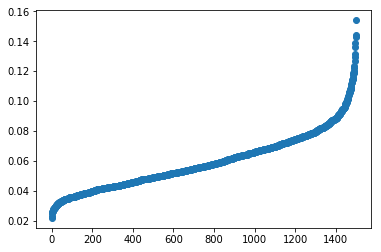

In [408]:
k_dists = dist[:, -1]
k_dists = np.sort(k_dists)
plt.plot(k_dists, 'o')
plt.show()

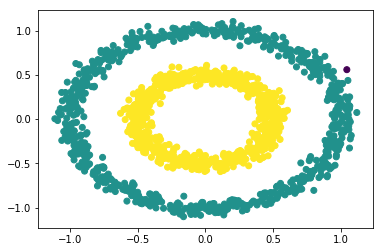

In [413]:
dbscan = cluster.DBSCAN(eps=0.1, min_samples=10)
ycircle_dbscan = dbscan.fit_predict(Xcircle)
plt.scatter(Xcircle[:, 0], Xcircle[:, 1], c=ycircle_dbscan)

### Find the proper eps for DBSCAN 

In [327]:
# k-dist curve

In [328]:
# sk.neighbors.NearestNeighbors

## Aggomerative clustering

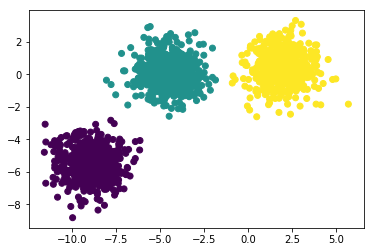

In [416]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [422]:
agg_clustering = cluster.AgglomerativeClustering(n_clusters=4)

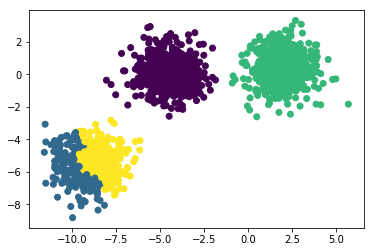

In [423]:
ypred = agg_clustering.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=ypred)
plt.show()

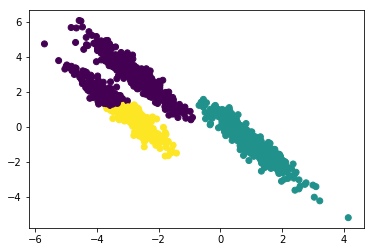

In [424]:
agg_clustering = cluster.AgglomerativeClustering(n_clusters=3)
ypred_ani = agg_clustering.fit_predict(Xani)
plt.scatter(Xani[:, 0], Xani[:, 1], c=ypred_ani)
plt.show()

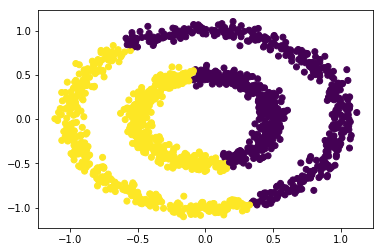

In [425]:
agg_clustering = cluster.AgglomerativeClustering(n_clusters=2)
ycircle_agg = agg_clustering.fit_predict(Xcircle)
plt.scatter(Xcircle[:, 0], Xcircle[:, 1], c=ycircle_agg)

## Gaussian Mixure

In [426]:
from sklearn import mixture

In [432]:
gmm = mixture.GaussianMixture(n_components=3)

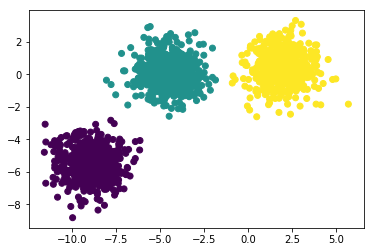

In [433]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [434]:
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [435]:
ypred = gmm.predict(X)

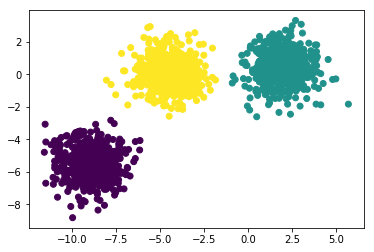

In [436]:
plt.scatter(X[:, 0], X[:, 1], c=ypred)
plt.show()

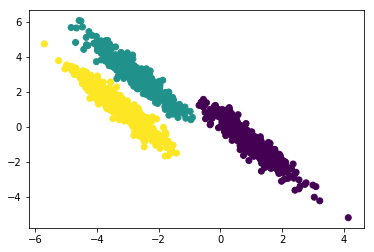

In [437]:
gmm = mixture.GaussianMixture(n_components=3)
gmm.fit(Xani)
ypred_ani = gmm.predict(Xani)

plt.scatter(Xani[:, 0], Xani[:, 1], c=ypred_ani)
plt.show()

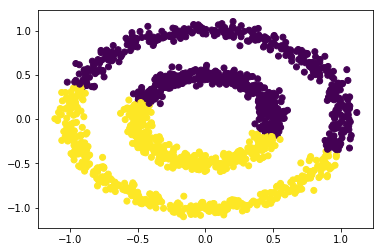

In [439]:
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(Xcircle)
ypred_circle = gmm.predict(Xcircle)
plt.scatter(Xcircle[:, 0], Xcircle[:, 1], c=ypred_circle)
plt.show()

# Outlier detection

In [296]:
from sklearn import covariance

In [264]:
## one-class SVM (novelty detection)
## EclipseEnvelop (outlier detection)

In [450]:
# define a dataset with in & out datasets
# inlier
# outlier
n_in = 100
n_out = 20
offset = np.array([1, 1]) * 0.1 
X1 = np.random.randn(n_in, 2) + offset
X2 = np.random.randn(n_in, 2) - offset

Xout = np.random.uniform(low=-6, high=6, size=(n_out, 2))
X = np.vstack([X1, X2, Xout])
print(X.shape)

(220, 2)


In [452]:
# X

In [453]:
sk.svm.OneClassSVM?

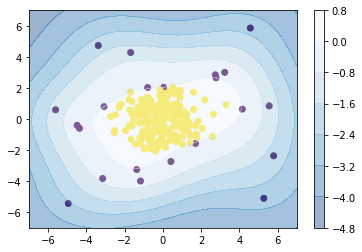

In [455]:
model = sk.svm.OneClassSVM(kernel='rbf', nu=0.1, gamma=0.1)
model.fit(X)
xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))

# plt.scatter(np.vstack([X1, X2])[:,0], 
#             np.vstack([X1, X2])[:,1], 
#             c=model.predict(np.vstack([X1, X2])))
plt.scatter(X[:,0], X[:,1], c=model.predict(X))

Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r, alpha=0.4)
plt.colorbar()
plt.show()

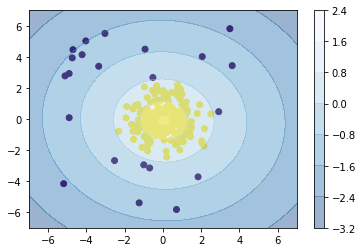

In [315]:
model = covariance.EllipticEnvelope(contamination=0.1, random_state=2020)
model.fit(X)
xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))

plt.scatter(X[:,0], X[:,1], c=model.predict(X))

Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r, alpha=0.4)
plt.colorbar()
plt.show()